In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# SUPPORT VECTOR MACHINES

## LINEAR Support Vector Machines

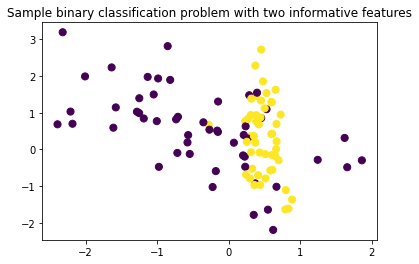

In [5]:
# synthetic dataset for classification (binary) 
from sklearn.datasets import make_classification
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50)
plt.show()

In [6]:
# separating datasets
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2)

In [8]:
# import SVM class.
from sklearn.svm import SVC

# similar to logistic regression and other regressions, LSVM supports regularization via the C attribute
    ## in this case, large values of C means LESS REGULARIZATION 
# the kernel attribute indicates this is a linear approach
LSVM = SVC(kernel="linear", C=50)

# then, similar to other models, we train the model.
LSVM.fit(X_train, y_train)

SVC(C=50, kernel='linear')

In [10]:
# the SVM can also generate a score, which represents the proportion of successes.
LSVM.score(X_test, y_test)

0.88

In [17]:
# comparing Logistic to LSVM for the same model
from sklearn.linear_model import LogisticRegression

# using same regularization parameter
LR = LogisticRegression(C=50)

LR.fit(X_train, y_train)

LogisticRegression(C=50)

In [18]:
print(LR.score(X_test, y_test))
print(LSVM.score(X_test, y_test))

0.84
0.88


# MULTI-CLASS CLASIFICATION

# KERNELIZED SUPPORT VECTOR MACHINES

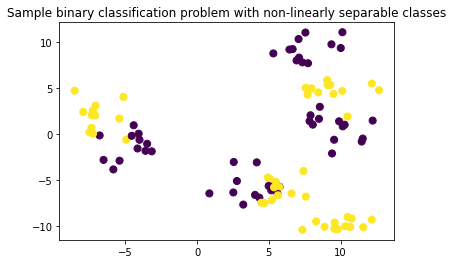

In [20]:
from sklearn.datasets import make_blobs
## more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

In [41]:
# importing the SVC
from sklearn.svm import SVC

# splitting the data for actual usage
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

# instantiationg the SVC
    ## using the Radial Base Function (RBF)
    ## RBF takes another parameter,  gamma, which basically controls the influence of a trending example. Low Gamma means a larger similarity radios, or more groups piled together
    ## a high gamma sharpens the function and forces it to more closely resemble training data
    ## the RBF formula is e to the power of -(gamma) times theabsolute distance between the points and the margin line.
KSVM = SVC(kernel="rbf", gamma=0.01, C=10)

# fitting to the training data
KSVM.fit(X_train, y_train)

# We can also use OTHER kernels
    ## this is the polynomial kernel and uses a degree additional parameter
KSVMW = SVC(kernel="poly", degree=3, C=10)
KSVMW.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [42]:
print(KSVM.score(X_test, y_test))
print(KSVMW.score(X_test, y_test))

0.76
0.76
